In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks


# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [218]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
df_balanced_class_counts = df_balanced["heart disease"].value_counts()

df_balanced_class_counts


heart disease
1    150
2     40
Name: count, dtype: int64

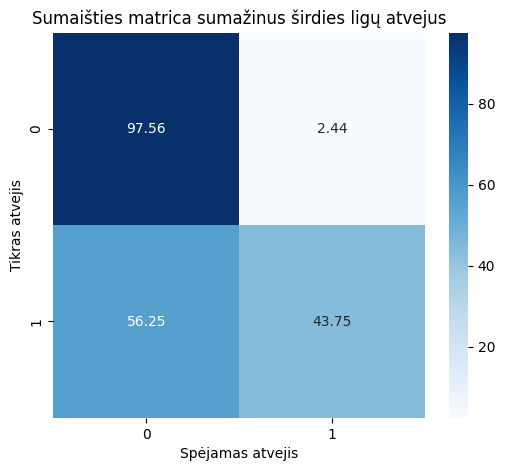

(0.8245614035087719,
 '              precision    recall  f1-score   support\n\n           1       0.82      0.98      0.89        41\n           2       0.88      0.44      0.58        16\n\n    accuracy                           0.82        57\n   macro avg       0.85      0.71      0.74        57\nweighted avg       0.83      0.82      0.80        57\n')

In [219]:
# Define features and target for the modified dataset
X_balanced = df_balanced.drop(columns=["heart disease"])  # Features
y_balanced = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X_balanced.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_balanced[column] = le.fit_transform(X_balanced[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.3, random_state=900
)

# Train MLP Classifier on data
mlp_balanced = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_balanced = mlp_balanced.predict(X_test_balanced)

# Compute confusion matrix
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

# Convert confusion matrix to percentages
cm_percentage = cm_balanced.astype('float') / cm_balanced.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica sumažinus širdies ligų atvejus")

# Save the figure as heart_mlp_10.png
plt.savefig("heart_mlp_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_10.png"
plt.show()

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
report_balanced = classification_report(y_test_balanced, y_pred_balanced)

accuracy_balanced, report_balanced


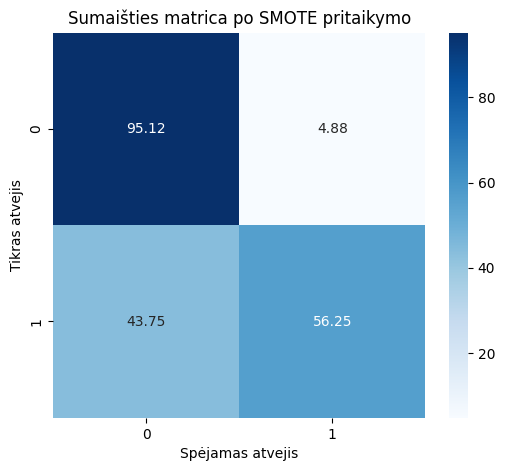

(0.8421052631578947,
 '              precision    recall  f1-score   support\n\n           1       0.85      0.95      0.90        41\n           2       0.82      0.56      0.67        16\n\n    accuracy                           0.84        57\n   macro avg       0.83      0.76      0.78        57\nweighted avg       0.84      0.84      0.83        57\n')

In [220]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train MLP Classifier on SMOTE-balanced data
mlp_balanced = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_balanced.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_balanced = mlp_balanced.predict(X_test)

# Compute confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Convert confusion matrix to percentages
cm_percentage = cm_balanced.astype('float') / cm_balanced.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica po SMOTE pritaikymo")

# Save the figure before showing it
plt.savefig("heart_mlp_SMOTE_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_SMOTE_10.png"

# Show the plot
plt.show()

# Evaluate the model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

accuracy_balanced, report_balanced



In [221]:
# Count the number of samples for each class in the train and test sets
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Print the number of samples for each class
print("Training set distribution:")
print(f"Heart Disease: {train_counts[2]} samples")
print(f"No Heart Disease: {train_counts[1]} samples")

print("\nTest set distribution:")
print(f"Heart Disease: {test_counts[2]} samples")
print(f"No Heart Disease: {test_counts[1]} samples")


Training set distribution:
Heart Disease: 24 samples
No Heart Disease: 109 samples

Test set distribution:
Heart Disease: 16 samples
No Heart Disease: 41 samples


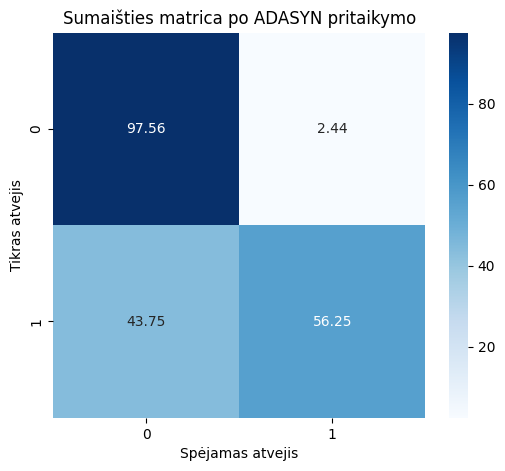

(0.8596491228070176,
 '              precision    recall  f1-score   support\n\n           1       0.85      0.98      0.91        41\n           2       0.90      0.56      0.69        16\n\n    accuracy                           0.86        57\n   macro avg       0.88      0.77      0.80        57\nweighted avg       0.86      0.86      0.85        57\n')

In [222]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying ADASYN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train MLP Classifier on ADASYN-balanced data
mlp_adasyn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred_adasyn = mlp_adasyn.predict(X_test)

# Compute confusion matrix
cm_adasyn = confusion_matrix(y_test, y_pred_adasyn)

# Convert confusion matrix to percentages
cm_percentage_adasyn = cm_adasyn.astype('float') / cm_adasyn.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage_adasyn, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica po ADASYN pritaikymo")

# Save the figure before showing it
plt.savefig("heart_mlp_ADASYN_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_ADASYN_10.png"

# Show the plot
plt.show()

# Evaluate the model
accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
report_adasyn = classification_report(y_test, y_pred_adasyn)

accuracy_adasyn, report_adasyn


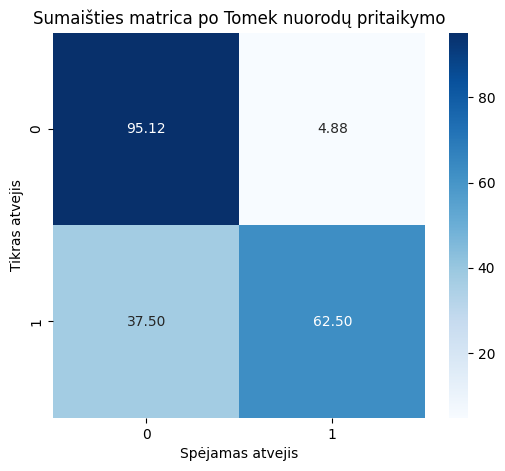

(0.8596491228070176,
 '              precision    recall  f1-score   support\n\n           1       0.87      0.95      0.91        41\n           2       0.83      0.62      0.71        16\n\n    accuracy                           0.86        57\n   macro avg       0.85      0.79      0.81        57\nweighted avg       0.86      0.86      0.85        57\n')

In [223]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying Tomek Links
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply Tomek Links only to the training data
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Train MLP Classifier on Tomek Links-balanced data
mlp_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_tomek.fit(X_train_tomek, y_train_tomek)

# Make predictions on the test set
y_pred_tomek = mlp_tomek.predict(X_test)

# Compute confusion matrix
cm_tomek = confusion_matrix(y_test, y_pred_tomek)

# Convert confusion matrix to percentages
cm_percentage_tomek = cm_tomek.astype('float') / cm_tomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage_tomek, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica po Tomek nuorodų pritaikymo")

# Save the figure before showing it
plt.savefig("heart_mlp_Tomek_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_Tomek_10.png"

# Show the plot
plt.show()

# Evaluate the model
accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
report_tomek = classification_report(y_test, y_pred_tomek)

accuracy_tomek, report_tomek



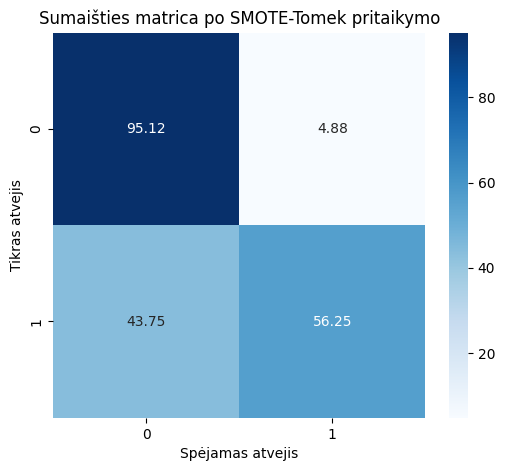

(0.8421052631578947,
 '              precision    recall  f1-score   support\n\n           1       0.85      0.95      0.90        41\n           2       0.82      0.56      0.67        16\n\n    accuracy                           0.84        57\n   macro avg       0.83      0.76      0.78        57\nweighted avg       0.84      0.84      0.83        57\n')

In [224]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Import necessary libraries for SMOTE-Tomek
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying SMOTE-Tomek
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply SMOTE-Tomek only to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Train MLP Classifier on SMOTE-Tomek balanced data
mlp_smote_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)

# Make predictions on the test set
y_pred_smote_tomek = mlp_smote_tomek.predict(X_test)

# Compute confusion matrix
cm_smote_tomek = confusion_matrix(y_test, y_pred_smote_tomek)

# Convert confusion matrix to percentages
cm_percentage_smote_tomek = cm_smote_tomek.astype('float') / cm_smote_tomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage_smote_tomek, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica po SMOTE-Tomek pritaikymo")

# Save the figure before showing it
plt.savefig("heart_mlp_SMOTETomek_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_SMOTETomek_10.png"

# Show the plot
plt.show()

# Evaluate the model
accuracy_smote_tomek = accuracy_score(y_test, y_pred_smote_tomek)
report_smote_tomek = classification_report(y_test, y_pred_smote_tomek)

accuracy_smote_tomek, report_smote_tomek



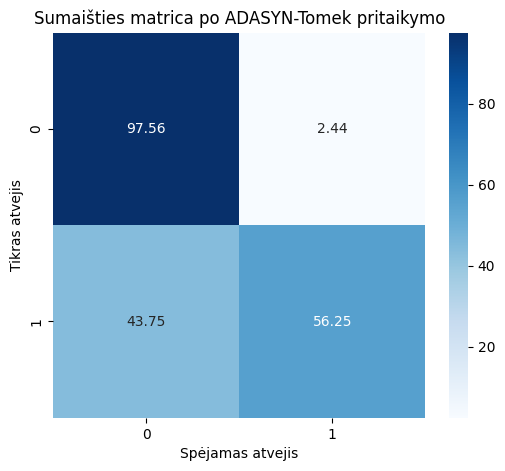

(0.8596491228070176,
 '              precision    recall  f1-score   support\n\n           1       0.85      0.98      0.91        41\n           2       0.90      0.56      0.69        16\n\n    accuracy                           0.86        57\n   macro avg       0.88      0.77      0.80        57\nweighted avg       0.86      0.86      0.85        57\n')

In [225]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying ADASYN-Tomek
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to the resampled training data
tomek = TomekLinks()
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# Train MLP Classifier on ADASYN-Tomek balanced data
mlp_adasyn_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_adasyn_tomek.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)

# Make predictions on the test set
y_pred_adasyn_tomek = mlp_adasyn_tomek.predict(X_test)

# Compute confusion matrix
cm_adasyn_tomek = confusion_matrix(y_test, y_pred_adasyn_tomek)

# Convert confusion matrix to percentages
cm_percentage_adasyn_tomek = cm_adasyn_tomek.astype('float') / cm_adasyn_tomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage_adasyn_tomek, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Spėjamas atvejis")
plt.ylabel("Tikras atvejis")
plt.title("Sumaišties matrica po ADASYN-Tomek pritaikymo")

# Save the figure before showing it
plt.savefig("heart_mlp_ADASYNTOMEK_10.png", bbox_inches="tight", dpi=300)

# Display the saved path
"heart_mlp_ADASYNTOMEK_10.png"

# Show the plot
plt.show()

# Evaluate the model
accuracy_adasyn_tomek = accuracy_score(y_test, y_pred_adasyn_tomek)
report_adasyn_tomek = classification_report(y_test, y_pred_adasyn_tomek)

accuracy_adasyn_tomek, report_adasyn_tomek


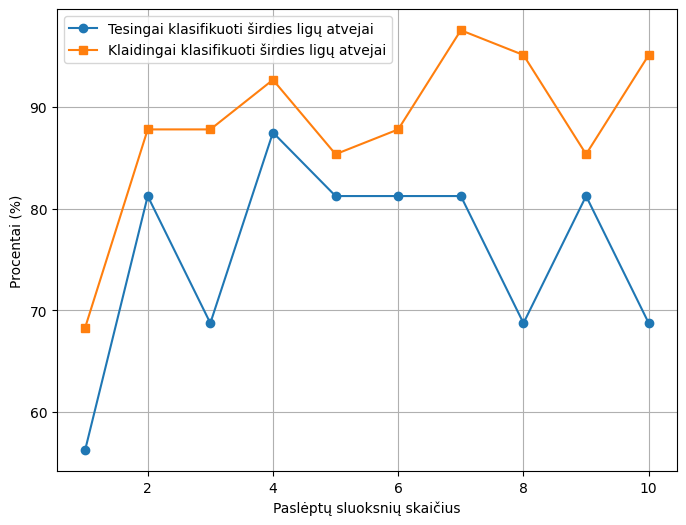

('heart_mlp_10_epochs_SMOTE.png', 'heart_mlp_10_accuracy_SMOTE.png')

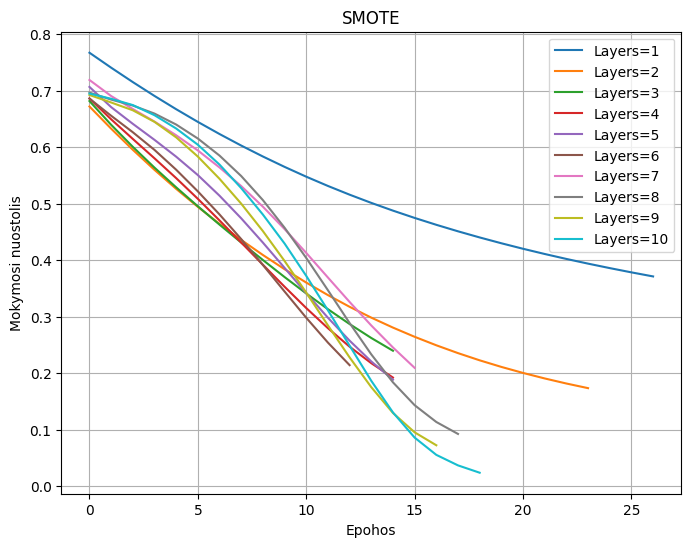

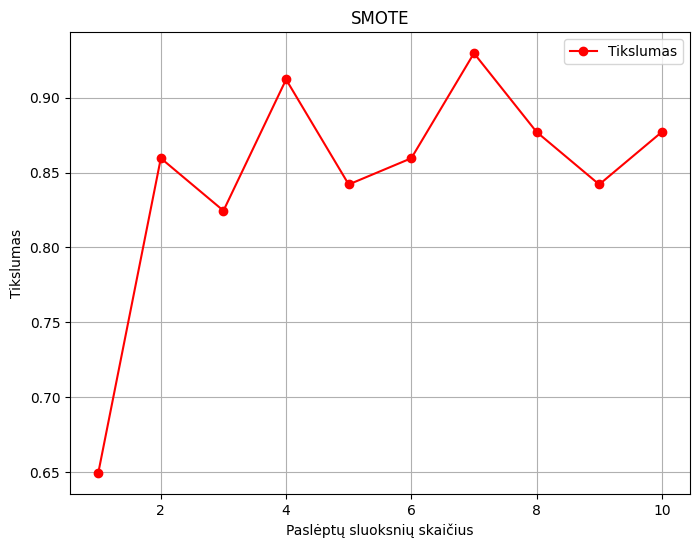

In [226]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Initialize lists to store results
layers = list(range(1, 11))
accuracies = []
true_positives = []
true_negatives = []
confusion_matrices = []
train_losses = []  # Track training loss for learning curve
valid_losses = []  # Track validation loss

# Train MLP Classifier with different numbers of layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500, random_state=1, early_stopping=True)
    
    # Train the model and track loss
    mlp.fit(X_train_smote, y_train_smote)
    
    # Store the training loss and validation loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the original test set
    y_pred = mlp.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    true_positives.append(cm[1, 1])  # TP
    true_negatives.append(cm[0, 0])  # TN

# Correctly calculate TP% and TN% relative to their actual class counts
tp_percentages_corrected = [(tp / (tp + cm[1, 0])) * 100 if (tp + cm[1, 0]) > 0 else 0 for tp, cm in zip(true_positives, confusion_matrices)]
tn_percentages_corrected = [(tn / (tn + cm[0, 1])) * 100 if (tn + cm[0, 1]) > 0 else 0 for tn, cm in zip(true_negatives, confusion_matrices)]

# Plot the corrected TP and TN percentages against the number of layers
plt.figure(figsize=(8, 6))
plt.plot(layers, tp_percentages_corrected, marker='o', linestyle='-', label="Tesingai klasifikuoti širdies ligų atvejai")
plt.plot(layers, tn_percentages_corrected, marker='s', linestyle='-', label="Klaidingai klasifikuoti širdies ligų atvejai")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Procentai (%)")
#plt.title("Tikrai teisingų ir tikrai neteisingų atvejų kaita pagal paslėptų sluoksnių skaičių")
plt.legend()
plt.grid()
plt.show()

# Display all confusion matrices
#for i, cm in enumerate(confusion_matrices):
   # plt.figure(figsize=(6, 5))
  #  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
  #  plt.xlabel("Predicted Label")
  #  plt.ylabel("True Label")
    #plt.title(f"Confusion Matrix (Layers={layers[i]})")
    #plt.show()
# Save the plots as requested

# Save the Training Loss Curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Layers={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("SMOTE")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_epochs_SMOTE.png", bbox_inches="tight", dpi=300)

# Save the Learning Curve: Accuracy vs. Number of Layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("SMOTE")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_accuracy_SMOTE.png", bbox_inches="tight", dpi=300)

# Display the saved paths
"heart_mlp_10_epochs_SMOTE.png", "heart_mlp_10_accuracy_SMOTE.png"




Iteration 1, loss = 0.80661228
Validation score: 0.500000
Iteration 2, loss = 0.78260719
Validation score: 0.500000
Iteration 3, loss = 0.75943096
Validation score: 0.500000
Iteration 4, loss = 0.73718313
Validation score: 0.500000
Iteration 5, loss = 0.71585398
Validation score: 0.500000
Iteration 6, loss = 0.69541547
Validation score: 0.636364
Iteration 7, loss = 0.67590838
Validation score: 0.636364
Iteration 8, loss = 0.65730426
Validation score: 0.727273
Iteration 9, loss = 0.63959751
Validation score: 0.772727
Iteration 10, loss = 0.62279425
Validation score: 0.818182
Iteration 11, loss = 0.60687025
Validation score: 0.818182
Iteration 12, loss = 0.59181396
Validation score: 0.863636
Iteration 13, loss = 0.57757900
Validation score: 0.909091
Iteration 14, loss = 0.56413125
Validation score: 0.909091
Iteration 15, loss = 0.55142170
Validation score: 0.909091
Iteration 16, loss = 0.53941711
Validation score: 0.909091
Iteration 17, loss = 0.52805858
Validation score: 0.954545
Iterat

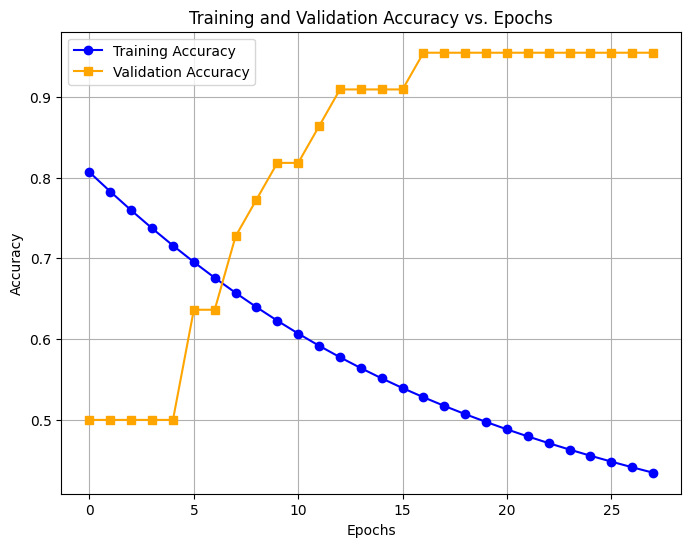

In [227]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize MLPClassifier with early stopping and verbose for tracking
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, verbose=True)

# Train the model
mlp.fit(X_train_smote, y_train_smote)

# Get training and validation accuracy from the training history
train_accuracy = mlp.loss_curve_  # Loss curve can help understand training accuracy
validation_accuracy = mlp.validation_scores_  # This stores the validation accuracy after each epoch

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(validation_accuracy, marker='s', linestyle='-', color='orange', label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()


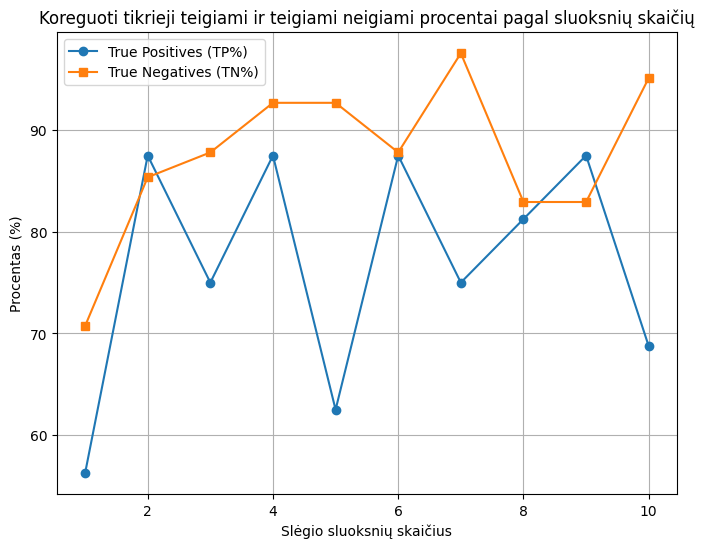

('heart_mlp_10_epochs_ADASYN.png', 'heart_mlp_10_accuracy_ADASYN.png')

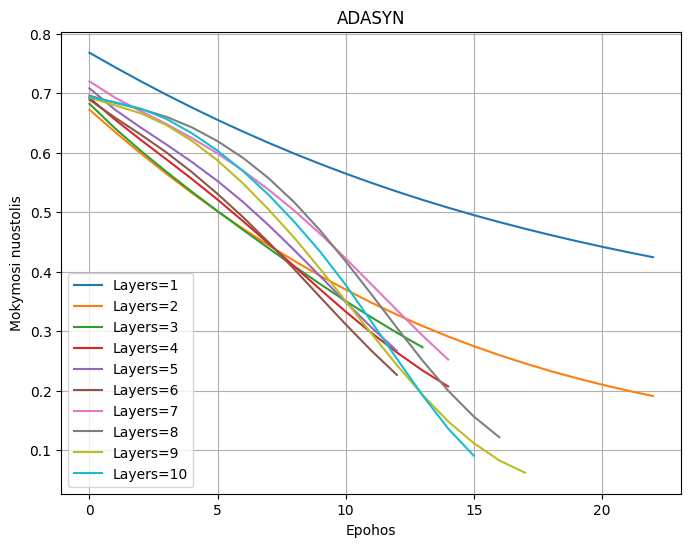

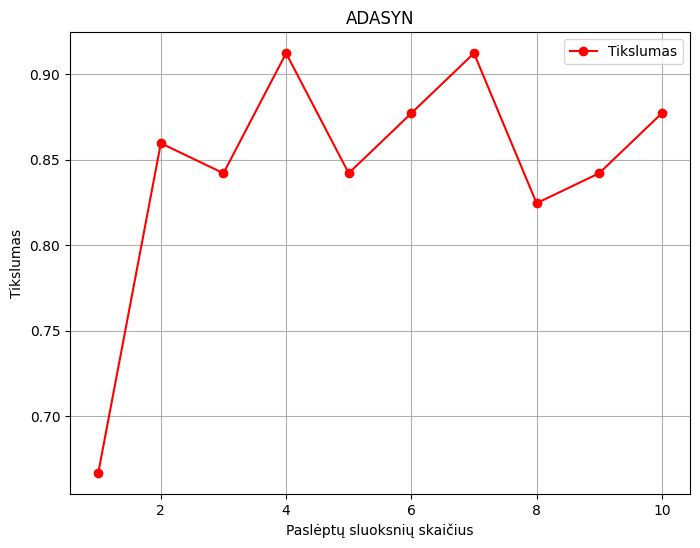

In [228]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying ADASYN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize lists to store results
accuracies_adasyn = []
true_positives_adasyn = []
true_negatives_adasyn = []
confusion_matrices_adasyn = []
train_losses_adasyn = []  # Track training loss for learning curve
valid_losses_adasyn = []  # Track validation loss

# Train MLP Classifier with different numbers of layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure
    
    mlp_adasyn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500, random_state=1, early_stopping=True)
    
    # Train the model and track loss
    mlp_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Store the training loss and validation loss
    train_losses_adasyn.append(mlp_adasyn.loss_curve_)
    
    # Make predictions on the original test set
    y_pred_adasyn = mlp_adasyn.predict(X_test)
    
    # Compute confusion matrix
    cm_adasyn = confusion_matrix(y_test, y_pred_adasyn)
    confusion_matrices_adasyn.append(cm_adasyn)
    
    # Store metrics
    accuracies_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    true_positives_adasyn.append(cm_adasyn[1, 1])  # TP
    true_negatives_adasyn.append(cm_adasyn[0, 0])  # TN

# Correctly calculate TP% and TN% relative to their actual class counts
tp_percentages_corrected_adasyn = [(tp / (tp + cm_adasyn[1, 0])) * 100 if (tp + cm_adasyn[1, 0]) > 0 else 0 for tp, cm_adasyn in zip(true_positives_adasyn, confusion_matrices_adasyn)]
tn_percentages_corrected_adasyn = [(tn / (tn + cm_adasyn[0, 1])) * 100 if (tn + cm_adasyn[0, 1]) > 0 else 0 for tn, cm_adasyn in zip(true_negatives_adasyn, confusion_matrices_adasyn)]

# Plot the corrected TP and TN percentages against the number of layers
plt.figure(figsize=(8, 6))
plt.plot(layers, tp_percentages_corrected_adasyn, marker='o', linestyle='-', label="True Positives (TP%)")
plt.plot(layers, tn_percentages_corrected_adasyn, marker='s', linestyle='-', label="True Negatives (TN%)")
plt.xlabel("Slėgio sluoksnių skaičius")
plt.ylabel("Procentas (%)")
plt.title("Koreguoti tikrieji teigiami ir teigiami neigiami procentai pagal sluoksnių skaičių")
plt.legend()
plt.grid()
plt.show()

# Display all confusion matrices
#for i, cm_adasyn in enumerate(confusion_matrices_adasyn):
 #   plt.figure(figsize=(6, 5))
  #  sns.heatmap(cm_adasyn, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
   # plt.xlabel("Numatytas ženklas")
    #plt.ylabel("Tikras ženklas")
    #plt.title(f"Sumaišties matrica (Sluoksniai={layers[i]})")
  #  plt.show()

# Save the Training Loss Curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses_adasyn):
    plt.plot(loss_curve, label=f'Layers={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("ADASYN")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_epochs_ADASYN.png", bbox_inches="tight", dpi=300)

# Save the Learning Curve: Accuracy vs. Number of Layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies_adasyn, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("ADASYN")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_accuracy_ADASYN.png", bbox_inches="tight", dpi=300)

# Display the saved paths
"heart_mlp_10_epochs_ADASYN.png", "heart_mlp_10_accuracy_ADASYN.png"


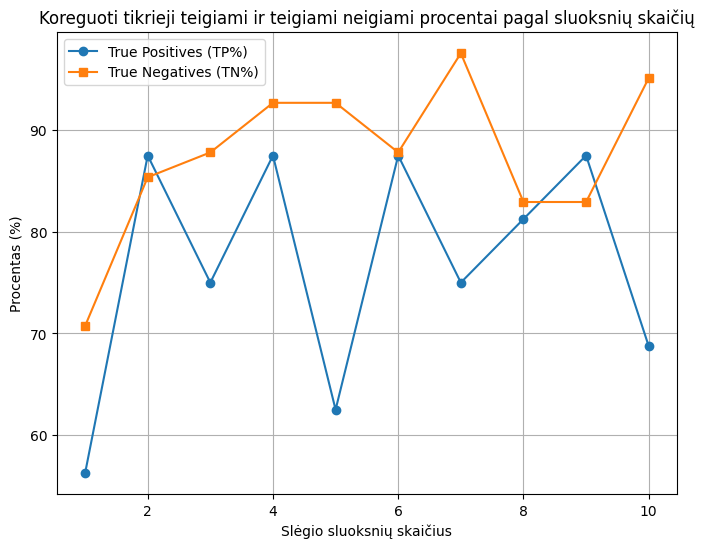

('heart_mlp_10_epochs_TOMEK.png', 'heart_mlp_10_accuracy_TOMEK.png')

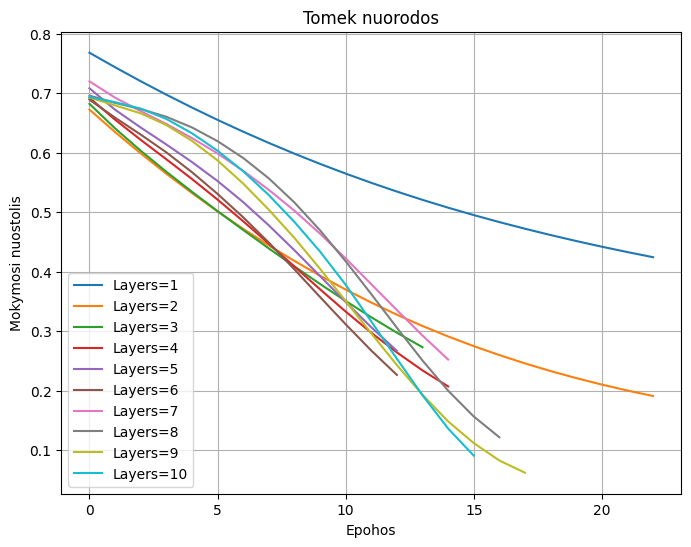

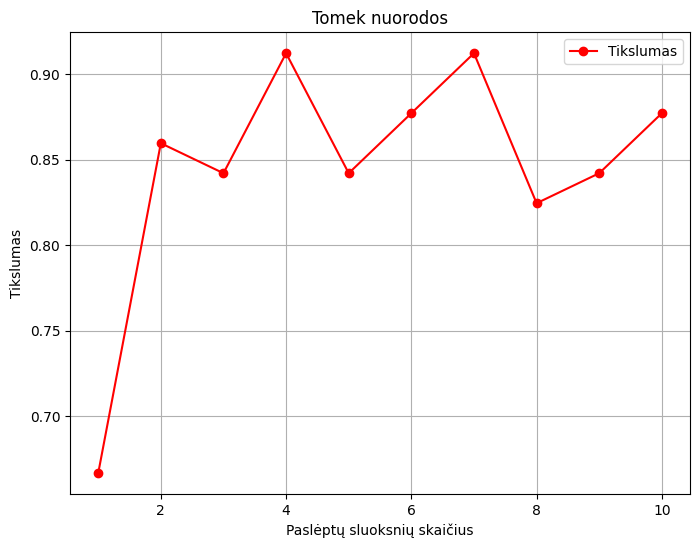

In [229]:
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Define features and target for the modified dataset
X = df_balanced.drop(columns=["heart disease"])  # Features
y = df_balanced["heart disease"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying Tomek Links
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply Tomek Links only to the training data
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Initialize lists to store results
accuracies_adasyn = []
true_positives_adasyn = []
true_negatives_adasyn = []
confusion_matrices_adasyn = []
train_losses_adasyn = []  # Track training loss for learning curve
valid_losses_adasyn = []  # Track validation loss

# Train MLP Classifier with different numbers of layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure
    
    mlp_adasyn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500, random_state=1, early_stopping=True)
    
    # Train the model and track loss
    mlp_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Store the training loss and validation loss
    train_losses_adasyn.append(mlp_adasyn.loss_curve_)
    
    # Make predictions on the original test set
    y_pred_adasyn = mlp_adasyn.predict(X_test)
    
    # Compute confusion matrix
    cm_adasyn = confusion_matrix(y_test, y_pred_adasyn)
    confusion_matrices_adasyn.append(cm_adasyn)
    
    # Store metrics
    accuracies_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    true_positives_adasyn.append(cm_adasyn[1, 1])  # TP
    true_negatives_adasyn.append(cm_adasyn[0, 0])  # TN

# Correctly calculate TP% and TN% relative to their actual class counts
tp_percentages_corrected_adasyn = [(tp / (tp + cm_adasyn[1, 0])) * 100 if (tp + cm_adasyn[1, 0]) > 0 else 0 for tp, cm_adasyn in zip(true_positives_adasyn, confusion_matrices_adasyn)]
tn_percentages_corrected_adasyn = [(tn / (tn + cm_adasyn[0, 1])) * 100 if (tn + cm_adasyn[0, 1]) > 0 else 0 for tn, cm_adasyn in zip(true_negatives_adasyn, confusion_matrices_adasyn)]

# Plot the corrected TP and TN percentages against the number of layers
plt.figure(figsize=(8, 6))
plt.plot(layers, tp_percentages_corrected_adasyn, marker='o', linestyle='-', label="True Positives (TP%)")
plt.plot(layers, tn_percentages_corrected_adasyn, marker='s', linestyle='-', label="True Negatives (TN%)")
plt.xlabel("Slėgio sluoksnių skaičius")
plt.ylabel("Procentas (%)")
plt.title("Koreguoti tikrieji teigiami ir teigiami neigiami procentai pagal sluoksnių skaičių")
plt.legend()
plt.grid()
plt.show()

# Display all confusion matrices
#for i, cm_adasyn in enumerate(confusion_matrices_adasyn):
 #   plt.figure(figsize=(6, 5))
  #  sns.heatmap(cm_adasyn, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
   # plt.xlabel("Numatytas ženklas")
    #plt.ylabel("Tikras ženklas")
    #plt.title(f"Sumaišties matrica (Sluoksniai={layers[i]})")
  #  plt.show()

# Save the Training Loss Curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses_adasyn):
    plt.plot(loss_curve, label=f'Layers={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_epochs_Tomek.png", bbox_inches="tight", dpi=300)

# Save the Learning Curve: Accuracy vs. Number of Layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies_adasyn, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_accuracy_TOMEK.png", bbox_inches="tight", dpi=300)

# Display the saved paths
"heart_mlp_10_epochs_TOMEK.png", "heart_mlp_10_accuracy_TOMEK.png"



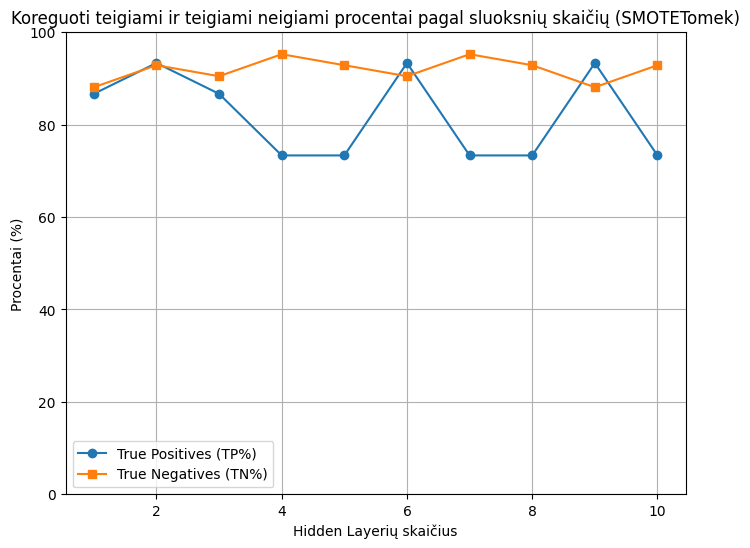

('heart_mlp_10_epochs_SMOTETomek.png', 'heart_mlp_10_accuracy_SMOTETomek.png')

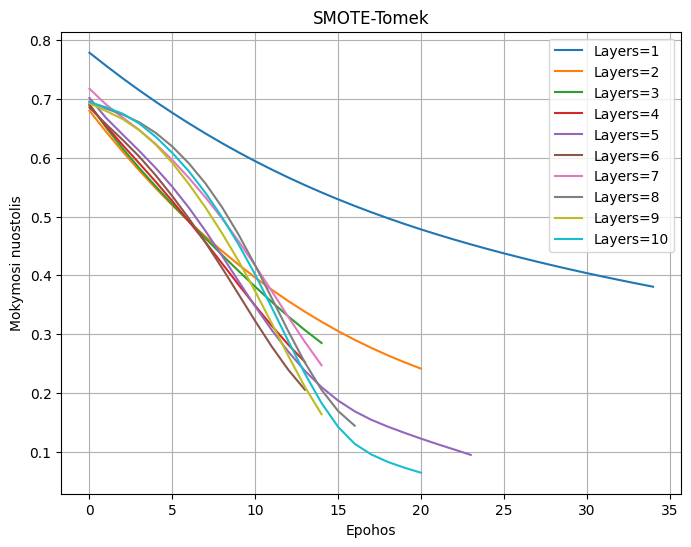

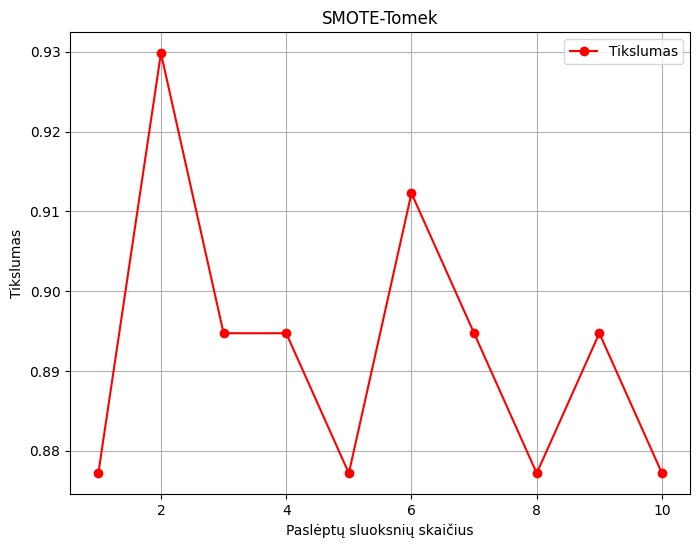

In [230]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=1)

# Apply SMOTETomek only to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Initialize lists to store results
layers = list(range(1, 11))
accuracies = []
true_positives = []
true_negatives = []
confusion_matrices = []
train_losses = []  # Track training loss for learning curve

# Train MLP Classifier with different numbers of layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500, random_state=1, early_stopping=True)
    
    # Train the model and track loss
    mlp.fit(X_train_smote_tomek, y_train_smote_tomek)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the original test set
    y_pred = mlp.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    true_positives.append(cm[1, 1])  # TP
    true_negatives.append(cm[0, 0])  # TN

# Correctly calculate TP% and TN% relative to their actual class counts
tp_percentages_corrected = [(tp / (tp + cm[1, 0])) * 100 if (tp + cm[1, 0]) > 0 else 0 for tp, cm in zip(true_positives, confusion_matrices)]
tn_percentages_corrected = [(tn / (tn + cm[0, 1])) * 100 if (tn + cm[0, 1]) > 0 else 0 for tn, cm in zip(true_negatives, confusion_matrices)]

# Plot the corrected TP and TN percentages against the number of layers
plt.figure(figsize=(8, 6))
plt.plot(layers, tp_percentages_corrected, marker='o', linestyle='-', label="True Positives (TP%)")
plt.plot(layers, tn_percentages_corrected, marker='s', linestyle='-', label="True Negatives (TN%)")
plt.xlabel("Hidden Layerių skaičius")
plt.ylabel("Procentai (%)")
plt.title("Koreguoti teigiami ir teigiami neigiami procentai pagal sluoksnių skaičių (SMOTETomek)")
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.legend()
plt.grid()
plt.show()


# Save the plots as requested
# Save the Training Loss Curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Layers={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("SMOTE-Tomek")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_epochs_SMOTETomek.png", bbox_inches="tight", dpi=300)

# Save the Learning Curve: Accuracy vs. Number of Layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("SMOTE-Tomek")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_accuracy_SMOTETomek.png", bbox_inches="tight", dpi=300)

# Display the saved paths
"heart_mlp_10_epochs_SMOTETomek.png", "heart_mlp_10_accuracy_SMOTETomek.png"


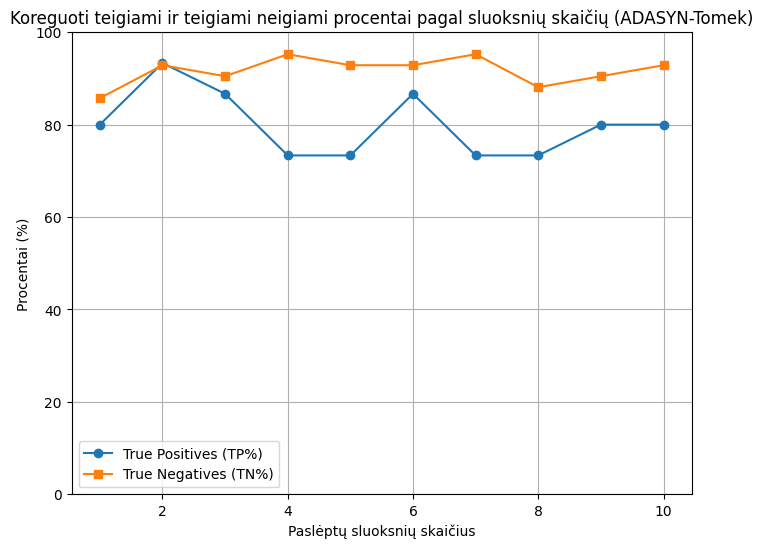

('heart_mlp_10_epochs_ADASYN-Tomek.png',
 'heart_mlp_10_accuracy_ADASYN-Tomek.png')

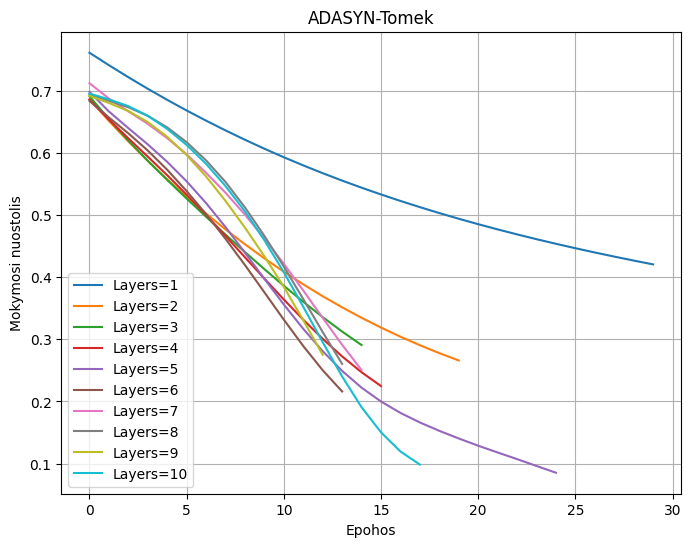

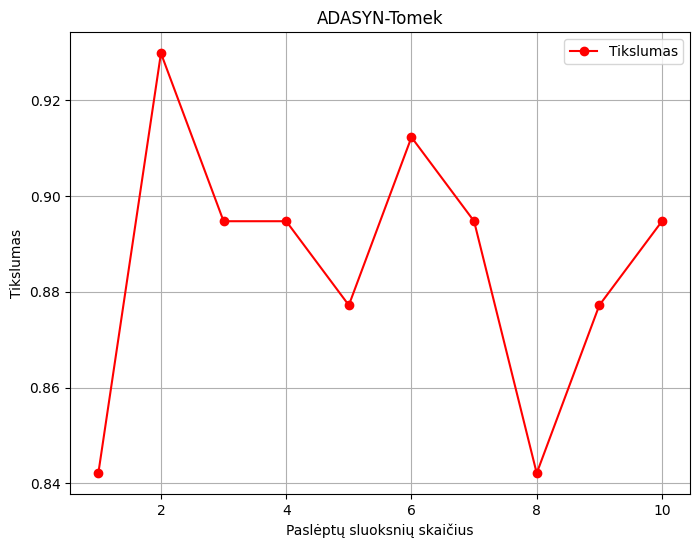

In [231]:

from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check class distribution before modification
class_counts = df["heart disease"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["heart disease"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["heart disease"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=1)

# Apply ADASYN and Tomek only to the training data
adasyn = ADASYN(random_state=42)
tomek = TomekLinks()

# Resampling using ADASYN
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Combine with Tomek Links
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# Initialize lists to store results
layers = list(range(1, 11))
accuracies = []
true_positives = []
true_negatives = []
confusion_matrices = []
train_losses = []  # Track training loss for learning curve

# Train MLP Classifier with different numbers of layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500, random_state=1, early_stopping=True)
    
    # Train the model and track loss
    mlp.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the original test set
    y_pred = mlp.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    true_positives.append(cm[1, 1])  # TP
    true_negatives.append(cm[0, 0])  # TN

# Correctly calculate TP% and TN% relative to their actual class counts
tp_percentages_corrected = [(tp / (tp + cm[1, 0])) * 100 if (tp + cm[1, 0]) > 0 else 0 for tp, cm in zip(true_positives, confusion_matrices)]
tn_percentages_corrected = [(tn / (tn + cm[0, 1])) * 100 if (tn + cm[0, 1]) > 0 else 0 for tn, cm in zip(true_negatives, confusion_matrices)]

# Plot the corrected TP and TN percentages against the number of layers
plt.figure(figsize=(8, 6))
plt.plot(layers, tp_percentages_corrected, marker='o', linestyle='-', label="True Positives (TP%)")
plt.plot(layers, tn_percentages_corrected, marker='s', linestyle='-', label="True Negatives (TN%)")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Procentai (%)")
plt.title("Koreguoti teigiami ir teigiami neigiami procentai pagal sluoksnių skaičių (ADASYN-Tomek)")
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.legend()
plt.grid()
plt.show()

# Save the Training Loss Curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Layers={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("ADASYN-Tomek")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_epochs_ADASYN-Tomek.png", bbox_inches="tight", dpi=300)

# Save the Learning Curve: Accuracy vs. Number of Layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("ADASYN-Tomek")
plt.legend()
plt.grid()
plt.savefig("heart_mlp_10_accuracy_ADASYN-Tomek.png", bbox_inches="tight", dpi=300)

# Display the saved paths
"heart_mlp_10_epochs_ADASYN-Tomek.png", "heart_mlp_10_accuracy_ADASYN-Tomek.png"


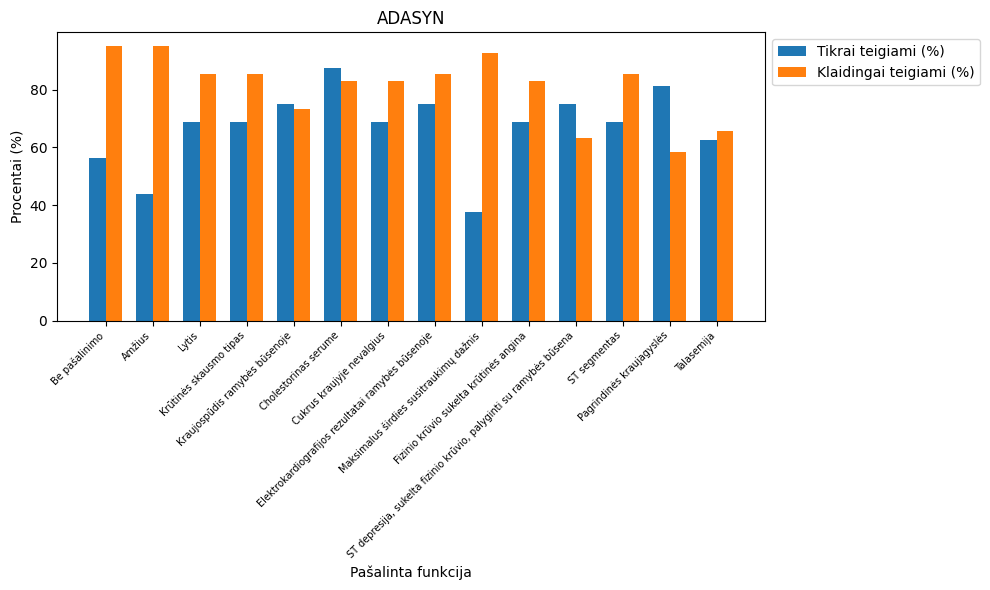

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
     "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija", "Širdies liga"
]

# Check class distribution before modification
class_counts = df["Širdies liga"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["Širdies liga"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Širdies liga"])  # Features
y = df_balanced["Širdies liga"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply SMOTE only to the training data
adasyn = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train MLP Classifier without removing any features to get baseline
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    # Split and apply SMOTE again
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_smote_temp, y_train_smote_temp = smote.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on SMOTE-balanced data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
    mlp.fit(X_train_smote_temp, y_train_smote_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)
    

# Plot TP% and TN% across removed features as a bar chart (side by side)
x_labels = ['Be pašalinimo'] + features_to_remove  # Adding the label for baseline
width = 0.35  # Bar width

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Klaidingai teigiami (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('ADASYN')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=7)  

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_ADASYN_TP_TN.png", dpi=300)
plt.show()

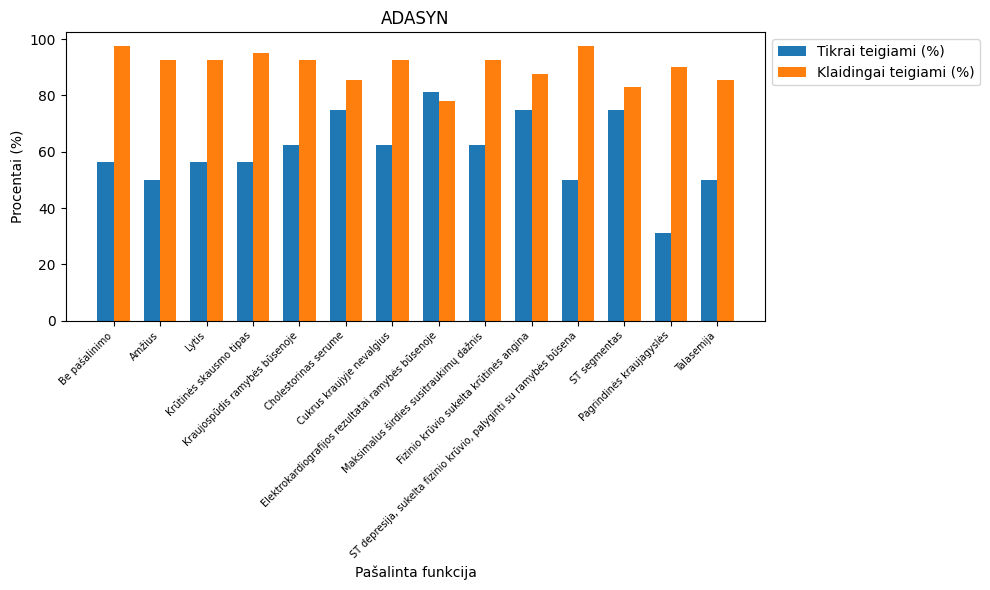

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
import numpy as np

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija", "Širdies liga"
]

# Check class distribution before modification
class_counts = df["Širdies liga"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["Širdies liga"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Širdies liga"])  # Features
y = df_balanced["Širdies liga"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying ADASYN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train MLP Classifier without removing any features to get baseline
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    # Split and apply ADASYN again
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_adasyn_temp, y_train_adasyn_temp = adasyn.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on ADASYN-balanced data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
    mlp.fit(X_train_adasyn_temp, y_train_adasyn_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Klaidingai teigiami (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('ADASYN')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=7)  

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("heart_ADASYN_TP_TN.png", dpi=300)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

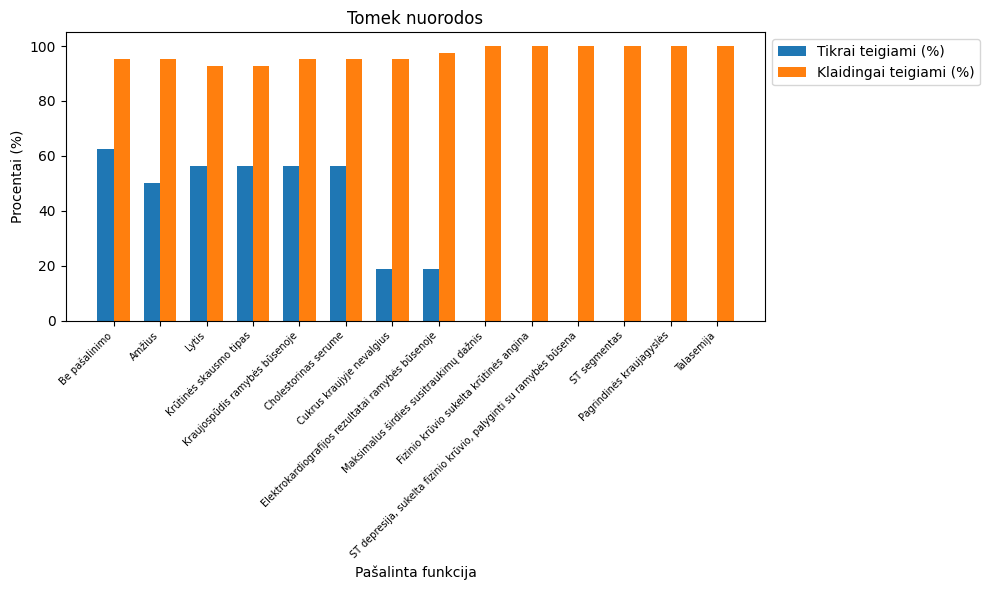

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.under_sampling import TomekLinks
import numpy as np

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija", "Širdies liga"
]

# Check class distribution before modification
class_counts = df["Širdies liga"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["Širdies liga"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Širdies liga"])  # Features
y = df_balanced["Širdies liga"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying Tomek Links
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply Tomek Links only to the training data
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Train MLP Classifier without removing any features to get baseline
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_tomek, y_train_tomek)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    # Split and apply Tomek Links again
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_tomek_temp, y_train_tomek_temp = tomek.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on Tomek Links-balanced data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
    mlp.fit(X_train_tomek_temp, y_train_tomek_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)
    
# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Klaidingai teigiami (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('Tomek nuorodos')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=7)  

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("heart_Tomek_TP_TN.png", dpi=300)
plt.show()

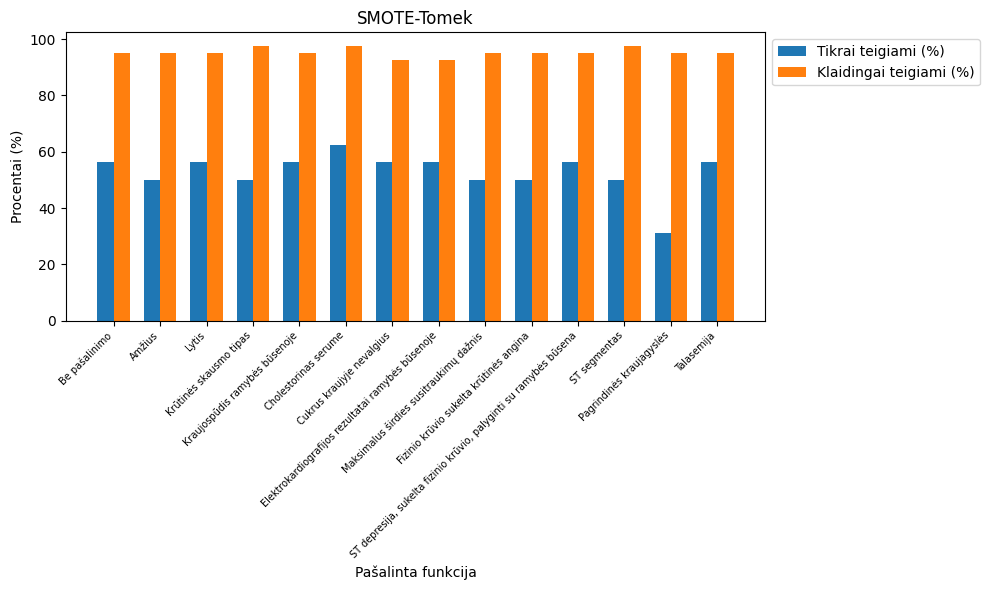

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
import numpy as np

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija", "Širdies liga"
]

# Check class distribution before modification
class_counts = df["Širdies liga"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["Širdies liga"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Širdies liga"])  # Features
y = df_balanced["Širdies liga"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets (before applying SMOTE-Tomek)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply SMOTE-Tomek only to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smote_tomek.fit_resample(X_train, y_train)

# ----------------
# Baseline Model
# ----------------
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_smt, y_train_smt)

# Predictions for baseline
y_pred = mlp.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# ----------------
# Feature Removal
# ----------------
features_to_remove = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija"
]

# Initialize lists for storing results
tp_percentages = [tp_baseline]  # Baseline TP
tn_percentages = [tn_baseline]  # Baseline TN
confusion_matrices = []
accuracies = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])

    # Split again and apply SMOTE-Tomek
    X_temp_scaled = scaler.fit_transform(X_temp)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp_scaled, y, test_size=0.3, random_state=900)
    X_train_smt_temp, y_train_smt_temp = smote_tomek.fit_resample(X_train_temp, y_train_temp)

    # Train MLP Classifier on SMOTE-Tomek balanced data
    mlp_temp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
    mlp_temp.fit(X_train_smt_temp, y_train_smt_temp)

    # Make predictions on the test set
    y_pred_temp = mlp_temp.predict(X_test_temp)

    # Compute confusion matrix
    cm_temp = confusion_matrix(y_test_temp, y_pred_temp)

    # Calculate percentages
    cm_percentage_temp = cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage_temp[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage_temp[0, 0])  # True Negatives (TN)

    # Save metrics
    accuracies.append(mlp_temp.score(X_test_temp, y_test_temp))
    confusion_matrices.append(cm_temp)
    
# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Klaidingai teigiami (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('SMOTE-Tomek')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=7)  

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("heart_SMOTETomek_TP_TN.png", dpi=300)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


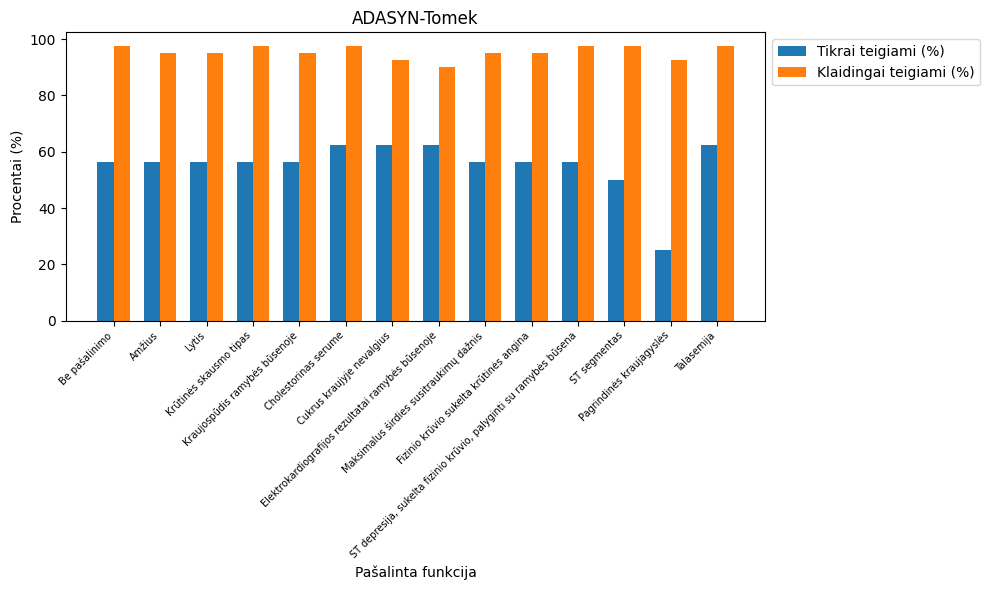

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
import numpy as np

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija", "Širdies liga"
]

# Check class distribution before modification
class_counts = df["Širdies liga"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Keep only 15% of the original minority class samples
num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

# Keep all majority class samples
df_majority = df[df["Širdies liga"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Širdies liga"])  # Features
y = df_balanced["Širdies liga"]  # Target

# Encode categorical variables if needed
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets (before applying ADASYN-Tomek)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=900)

# Apply ADASYN-Tomek only to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# ----------------
# Baseline Model
# ----------------
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)

# Predictions for baseline
y_pred = mlp.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# ----------------
# Feature Removal
# ----------------
features_to_remove = [
    "Amžius", "Lytis", "Krūtinės skausmo tipas", 
    "Kraujospūdis ramybės būsenoje", "Cholestorinas serume", 
    "Cukrus kraujyje nevalgius", "Elektrokardiografijos rezultatai ramybės būsenoje", 
    "Maksimalus širdies susitraukimų dažnis", "Fizinio krūvio sukelta krūtinės angina", 
    "ST depresija, sukelta fizinio krūvio, palyginti su ramybės būsena", 
    "ST segmentas", "Pagrindinės kraujagyslės", "Talasemija"
]

# Initialize lists for storing results
tp_percentages = [tp_baseline]  # Baseline TP
tn_percentages = [tn_baseline]  # Baseline TN
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])

    # Split again and apply ADASYN-Tomek
    X_temp_scaled = scaler.fit_transform(X_temp)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp_scaled, y, test_size=0.3, random_state=900)
    X_train_adasyn_temp, y_train_adasyn_temp = adasyn.fit_resample(X_train_temp, y_train_temp)
    X_train_adasyn_tomek_temp, y_train_adasyn_tomek_temp = tomek.fit_resample(X_train_adasyn_temp, y_train_adasyn_temp)

    # Train MLP Classifier on ADASYN-Tomek balanced data
    mlp_temp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
    mlp_temp.fit(X_train_adasyn_tomek_temp, y_train_adasyn_tomek_temp)

    # Make predictions on the test set
    y_pred_temp = mlp_temp.predict(X_test_temp)

    # Compute confusion matrix
    cm_temp = confusion_matrix(y_test_temp, y_pred_temp)

    # Calculate percentages
    cm_percentage_temp = cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage_temp[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage_temp[0, 0])  # True Negatives (TN)

    # Save metrics
    accuracies.append(mlp_temp.score(X_test_temp, y_test_temp))
    confusion_matrices.append(cm_temp)

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Klaidingai teigiami (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('ADASYN-Tomek')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=7)  

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_ADASYNTomek_TP_TN.png", dpi=300)
plt.show()
